In [4]:
import os
import pandas as pd
import numpy as np

path = r'E:\repo\ml_bt\MA'
all_path = [os.path.join(path,x) for x in os.listdir(path) if 'MA2205' in x]
all_path

['E:\\repo\\ml_bt\\MA\\MA2205.csv']

In [5]:
# 准备数据
data = pd.read_csv(all_path[0],index_col=0)
data

,date,open,high,low,close,volume,money,open_interest
0,2021-05-19 21:05:00,2721.0,2721.0,2598.0,2606.0,2.0,5.204000e+04,2.0
1,2021-05-19 21:10:00,2606.0,2648.0,2606.0,2648.0,1.0,2.647000e+04,2.0
2,2021-05-19 21:15:00,2648.0,2648.0,2648.0,2648.0,0.0,0.000000e+00,2.0
3,2021-05-19 21:20:00,2648.0,2648.0,2648.0,2648.0,0.0,0.000000e+00,2.0
4,2021-05-19 21:25:00,2648.0,2648.0,2637.0,2637.0,1.0,2.637000e+04,3.0
...,...,...,...,...,...,...,...,...
9997,2021-12-21 14:40:00,2575.0,2579.0,2571.0,2575.0,11741.0,3.042093e+08,875298.0
9998,2021-12-21 14:45:00,2575.0,2579.0,2572.0,2576.0,9408.0,2.437613e+08,878924.0
9999,2021-12-21 14:50:00,2575.0,2577.0,2568.0,2570.0,13602.0,3.395225e+08,884105.0
10000,2021-12-21 14:55:00,2570.0,2570.0,2556.0,2562.0,48947.0,1.254333e+09,896922.0


In [6]:
# 成交量处理
med = np.median(data.volume)
factor = np.where(data.volume<10*med,10*med,data.volume)
data['volume'] = factor

In [7]:
# 计算收益
data['close_shift(-5)'] = data['close'].shift(-5)
data['return'] = data['close_shift(-5)']-data['close']

In [8]:
# 查看收益的分布
data.iloc[1000:,:].describe().T

,count,mean,std,min,25%,50%,75%,max
open,9002.0,2.717601e+03,2.407548e+02,2410.0,2560.00,2664.0,2730.0,3.640000e+03
high,9002.0,2.722108e+03,2.425105e+02,2413.0,2564.00,2667.0,2733.0,3.649000e+03
low,9002.0,2.713113e+03,2.388677e+02,2403.0,2555.00,2661.0,2727.0,3.613000e+03
close,9002.0,2.717609e+03,2.407180e+02,2405.0,2560.00,2664.0,2730.0,3.641000e+03
volume,9002.0,2.379647e+03,4.975586e+03,905.0,905.00,905.0,1431.0,9.952000e+04
money,9002.0,4.865938e+07,1.337752e+08,0.0,188662.50,4741185.0,38776865.0,2.586525e+09
open_interest,9002.0,1.075386e+05,1.665035e+05,1185.0,4167.25,51438.5,124221.0,9.021820e+05
close_shift(-5),8997.0,2.717740e+03,2.407208e+02,2405.0,2560.00,2664.0,2730.0,3.641000e+03
return,8997.0,4.901634e-02,1.896892e+01,-244.0,-7.00,0.0,8.0,2.550000e+02


<AxesSubplot:ylabel='Density'>

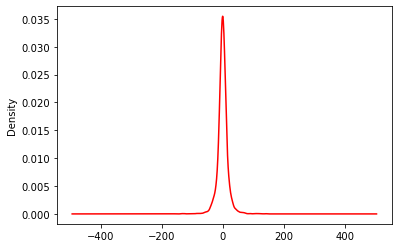

In [9]:
# 收益的概率分布图
data.iloc[1000:,:]['return'].plot(kind='kde',color='r')

<AxesSubplot:>

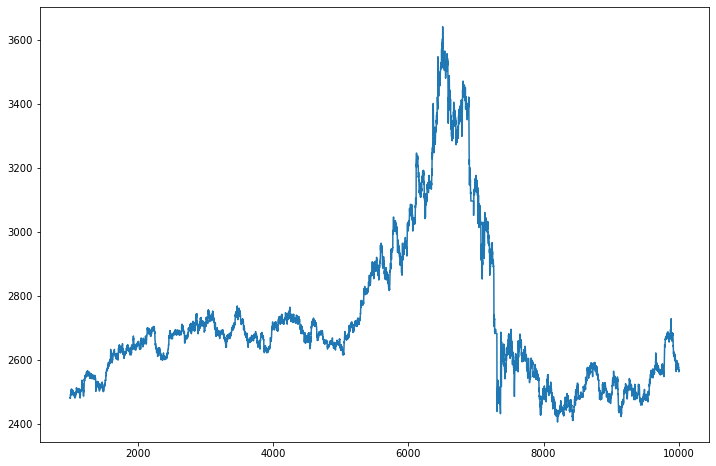

In [10]:
# 查看数据走势
data.iloc[1000:,:]['close'].plot(figsize=(12,8))

In [11]:
# 处理标签
data.loc[:,'label'] = 0
data.loc[data['return']>=4,'label'] = 1
data.loc[data['return']<=-4,'label'] = -1
data

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,label
0,2021-05-19 21:05:00,2721.0,2721.0,2598.0,2606.0,905.0,5.204000e+04,2.0,2636.0,30.0,1
1,2021-05-19 21:10:00,2606.0,2648.0,2606.0,2648.0,905.0,2.647000e+04,2.0,2636.0,-12.0,-1
2,2021-05-19 21:15:00,2648.0,2648.0,2648.0,2648.0,905.0,0.000000e+00,2.0,2602.0,-46.0,-1
3,2021-05-19 21:20:00,2648.0,2648.0,2648.0,2648.0,905.0,0.000000e+00,2.0,2601.0,-47.0,-1
4,2021-05-19 21:25:00,2648.0,2648.0,2637.0,2637.0,905.0,2.637000e+04,3.0,2634.0,-3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,2021-12-21 14:40:00,2575.0,2579.0,2571.0,2575.0,11741.0,3.042093e+08,875298.0,NaN,NaN,0
9998,2021-12-21 14:45:00,2575.0,2579.0,2572.0,2576.0,9408.0,2.437613e+08,878924.0,NaN,NaN,0
9999,2021-12-21 14:50:00,2575.0,2577.0,2568.0,2570.0,13602.0,3.395225e+08,884105.0,NaN,NaN,0
10000,2021-12-21 14:55:00,2570.0,2570.0,2556.0,2562.0,48947.0,1.254333e+09,896922.0,NaN,NaN,0


In [12]:
# 构建因子
from CreateFeatures import * 
import copy
data1 = copy.deepcopy(data)
data1

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,label
0,2021-05-19 21:05:00,2721.0,2721.0,2598.0,2606.0,905.0,5.204000e+04,2.0,2636.0,30.0,1
1,2021-05-19 21:10:00,2606.0,2648.0,2606.0,2648.0,905.0,2.647000e+04,2.0,2636.0,-12.0,-1
2,2021-05-19 21:15:00,2648.0,2648.0,2648.0,2648.0,905.0,0.000000e+00,2.0,2602.0,-46.0,-1
3,2021-05-19 21:20:00,2648.0,2648.0,2648.0,2648.0,905.0,0.000000e+00,2.0,2601.0,-47.0,-1
4,2021-05-19 21:25:00,2648.0,2648.0,2637.0,2637.0,905.0,2.637000e+04,3.0,2634.0,-3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,2021-12-21 14:40:00,2575.0,2579.0,2571.0,2575.0,11741.0,3.042093e+08,875298.0,NaN,NaN,0
9998,2021-12-21 14:45:00,2575.0,2579.0,2572.0,2576.0,9408.0,2.437613e+08,878924.0,NaN,NaN,0
9999,2021-12-21 14:50:00,2575.0,2577.0,2568.0,2570.0,13602.0,3.395225e+08,884105.0,NaN,NaN,0
10000,2021-12-21 14:55:00,2570.0,2570.0,2556.0,2562.0,48947.0,1.254333e+09,896922.0,NaN,NaN,0


In [13]:
    data1 = feature1(data1,13)
    data1 = feature1(data1,21)
    data1 = feature1(data1,34)
    data1 = feature1(data1,55)
    data1 = feature1(data1,89)
    data1 = feature1(data1,144)
    data1 = feature1(data1,233)

    data1 = feature2(data1,10)
    data1 = feature2(data1,21)
    data1 = feature2(data1,55)
    data1 = feature2(data1,89)

    data1 = feature3(data1,3)
    data1 = feature3(data1,5)
    data1 = feature3(data1,8)
    data1 = feature3(data1,13)
    data1 = feature3(data1,21)
    data1 = feature3(data1,34)
    data1 = feature3(data1,55)

    data1 = feature4(data1,'date')

    data1 = feature5(data1,55)
    data1 = feature5(data1,70)
    data1 = feature5(data1,89)
    data1 = feature5(data1,144)

    data1 = feature6(data1,8)
    data1 = feature6(data1,13)
    data1 = feature6(data1,21)
    data1 = feature6(data1,34)
    data1 = feature6(data1,55)
    data1 = feature6(data1,89)
    
    data1 = feature8(data1,21)
    data1 = feature8(data1,34)
    data1 = feature8(data1,55)
    data1 = feature8(data1,89)
    
    data1 = feature9(data1,21)
    data1 = feature9(data1,34)
    data1 = feature9(data1,55)
    data1 = feature9(data1,89)
    
    data1 = feature10(data1,21)
    data1 = feature10(data1,34)
    data1 = feature10(data1,55)
    data1 = feature10(data1,89)
    
    data1 = feature11(data1,9)
    data1 = feature11(data1,14)
    
    data1 = feature12(data1,10)
    data1 = feature12(data1,30)
    
    data1 = feature13(data1,9)
    data1 = feature13(data1,21)
    data1 = feature13(data1,34)
    data1 = feature13(data1,55)

In [14]:
# 分割数据
data1 = data1.iloc[1000:,:]
data1

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,...,feature10_55,feature10_89,feature11_9,feature11_14,feature12_10,feature12_30,feature13_9,feature13_21,feature13_34,feature13_55
1000,2021-06-09 09:55:00,2482.0,2482.0,2481.0,2481.0,905.0,2.486000e+04,3093.0,2491.0,10.0,...,0.047795,0.031120,40.814870,43.607286,1.000000,1.000000,5.995369,5.070926,4.370232,7.132323
1001,2021-06-09 10:00:00,2481.0,2482.0,2481.0,2482.0,905.0,4.972000e+04,3095.0,2491.0,9.0,...,0.029552,0.009471,43.263663,45.178704,1.000000,1.000000,5.291503,5.173191,4.300334,7.081155
1002,2021-06-09 10:05:00,2482.0,2482.0,2482.0,2482.0,905.0,0.000000e+00,3095.0,2488.0,6.0,...,0.030282,0.007893,43.263663,45.178704,1.000000,1.000000,3.741657,5.266245,4.332545,7.068115
1003,2021-06-09 10:10:00,2482.0,2484.0,2479.0,2479.0,905.0,4.972000e+04,3097.0,2492.0,13.0,...,0.090845,0.065176,37.389857,41.185649,1.000000,1.000000,3.045944,5.504544,4.480598,7.054955
1004,2021-06-09 10:15:00,2479.0,2486.0,2479.0,2486.0,905.0,2.486000e+04,3097.0,2490.0,4.0,...,0.045603,0.075550,53.840607,51.874041,1.000000,1.000000,2.833333,5.499784,4.473431,6.964073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,2021-12-21 14:40:00,2575.0,2579.0,2571.0,2575.0,11741.0,3.042093e+08,875298.0,NaN,NaN,...,0.229867,0.549685,43.931730,44.881327,1.042458,0.863438,3.972125,4.780914,7.236765,12.700062
9998,2021-12-21 14:45:00,2575.0,2579.0,2572.0,2576.0,9408.0,2.437613e+08,878924.0,NaN,NaN,...,0.198430,0.506857,45.523988,45.823150,0.890589,0.695344,4.146618,4.791858,7.272699,12.402617
9999,2021-12-21 14:50:00,2575.0,2577.0,2568.0,2570.0,13602.0,3.395225e+08,884105.0,NaN,NaN,...,0.299662,0.599739,38.201191,41.266892,1.271821,1.025215,5.074446,5.062467,7.475748,11.839926
10000,2021-12-21 14:55:00,2570.0,2570.0,2556.0,2562.0,48947.0,1.254333e+09,896922.0,NaN,NaN,...,0.439912,0.730146,30.775552,36.111182,3.370541,3.462390,7.361688,6.046644,8.135276,11.749490


In [15]:
data1 = data1.reset_index(drop=True)
data1

,date,open,high,low,close,volume,money,open_interest,close_shift(-5),return,...,feature10_55,feature10_89,feature11_9,feature11_14,feature12_10,feature12_30,feature13_9,feature13_21,feature13_34,feature13_55
0,2021-06-09 09:55:00,2482.0,2482.0,2481.0,2481.0,905.0,2.486000e+04,3093.0,2491.0,10.0,...,0.047795,0.031120,40.814870,43.607286,1.000000,1.000000,5.995369,5.070926,4.370232,7.132323
1,2021-06-09 10:00:00,2481.0,2482.0,2481.0,2482.0,905.0,4.972000e+04,3095.0,2491.0,9.0,...,0.029552,0.009471,43.263663,45.178704,1.000000,1.000000,5.291503,5.173191,4.300334,7.081155
2,2021-06-09 10:05:00,2482.0,2482.0,2482.0,2482.0,905.0,0.000000e+00,3095.0,2488.0,6.0,...,0.030282,0.007893,43.263663,45.178704,1.000000,1.000000,3.741657,5.266245,4.332545,7.068115
3,2021-06-09 10:10:00,2482.0,2484.0,2479.0,2479.0,905.0,4.972000e+04,3097.0,2492.0,13.0,...,0.090845,0.065176,37.389857,41.185649,1.000000,1.000000,3.045944,5.504544,4.480598,7.054955
4,2021-06-09 10:15:00,2479.0,2486.0,2479.0,2486.0,905.0,2.486000e+04,3097.0,2490.0,4.0,...,0.045603,0.075550,53.840607,51.874041,1.000000,1.000000,2.833333,5.499784,4.473431,6.964073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8997,2021-12-21 14:40:00,2575.0,2579.0,2571.0,2575.0,11741.0,3.042093e+08,875298.0,NaN,NaN,...,0.229867,0.549685,43.931730,44.881327,1.042458,0.863438,3.972125,4.780914,7.236765,12.700062
8998,2021-12-21 14:45:00,2575.0,2579.0,2572.0,2576.0,9408.0,2.437613e+08,878924.0,NaN,NaN,...,0.198430,0.506857,45.523988,45.823150,0.890589,0.695344,4.146618,4.791858,7.272699,12.402617
8999,2021-12-21 14:50:00,2575.0,2577.0,2568.0,2570.0,13602.0,3.395225e+08,884105.0,NaN,NaN,...,0.299662,0.599739,38.201191,41.266892,1.271821,1.025215,5.074446,5.062467,7.475748,11.839926
9000,2021-12-21 14:55:00,2570.0,2570.0,2556.0,2562.0,48947.0,1.254333e+09,896922.0,NaN,NaN,...,0.439912,0.730146,30.775552,36.111182,3.370541,3.462390,7.361688,6.046644,8.135276,11.749490


In [16]:
# 截取因子
col_list = [x for x in list(data1.columns) if 'feature' in x]
col_list

['feature1_13',
 'feature1_21',
 'feature1_34',
 'feature1_55',
 'feature1_89',
 'feature1_144',
 'feature1_233',
 'feature2_10',
 'feature2_21',
 'feature2_55',
 'feature2_89',
 'feature3_3',
 'feature3_5',
 'feature3_8',
 'feature3_13',
 'feature3_21',
 'feature3_34',
 'feature3_55',
 'feature4',
 'feature5_55',
 'feature5_70',
 'feature5_89',
 'feature5_144',
 'feature6_8',
 'feature6_13',
 'feature6_21',
 'feature6_34',
 'feature6_55',
 'feature6_89',
 'feature8_21',
 'feature8_34',
 'feature8_55',
 'feature8_89',
 'feature9_21',
 'feature9_34',
 'feature9_55',
 'feature9_89',
 'feature10_21',
 'feature10_34',
 'feature10_55',
 'feature10_89',
 'feature11_9',
 'feature11_14',
 'feature12_10',
 'feature12_30',
 'feature13_9',
 'feature13_21',
 'feature13_34',
 'feature13_55']

In [17]:
# 特征矩阵
X = data1[col_list]
X

,feature1_13,feature1_21,feature1_34,feature1_55,feature1_89,feature1_144,feature1_233,feature2_10,feature2_21,feature2_55,...,feature10_55,feature10_89,feature11_9,feature11_14,feature12_10,feature12_30,feature13_9,feature13_21,feature13_34,feature13_55
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.141323,-0.067297,-0.025695,...,0.047795,0.031120,40.814870,43.607286,1.000000,1.000000,5.995369,5.070926,4.370232,7.132323
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.124052,-0.059072,-0.022555,...,0.029552,0.009471,43.263663,45.178704,1.000000,1.000000,5.291503,5.173191,4.300334,7.081155
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.106902,-0.050906,-0.019437,...,0.030282,0.007893,43.263663,45.178704,1.000000,1.000000,3.741657,5.266245,4.332545,7.068115
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.109628,-0.052204,-0.019932,...,0.090845,0.065176,37.389857,41.185649,1.000000,1.000000,3.045944,5.504544,4.480598,7.054955
4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,-0.060603,-0.028858,-0.011019,...,0.045603,0.075550,53.840607,51.874041,1.000000,1.000000,2.833333,5.499784,4.473431,6.964073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033178,0.015799,0.006032,...,0.229867,0.549685,43.931730,44.881327,1.042458,0.863438,3.972125,4.780914,7.236765,12.700062
8998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021871,0.010415,0.003977,...,0.198430,0.506857,45.523988,45.823150,0.890589,0.695344,4.146618,4.791858,7.272699,12.402617
8999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.022539,-0.010733,-0.004098,...,0.299662,0.599739,38.201191,41.266892,1.271821,1.025215,5.074446,5.062467,7.475748,11.839926
9000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.098082,-0.046706,-0.017833,...,0.439912,0.730146,30.775552,36.111182,3.370541,3.462390,7.361688,6.046644,8.135276,11.749490


In [18]:
# 标签
Y = data1['label']
Y

0       1
1       1
2       1
3       1
4       1
       ..
8997    0
8998    0
8999    0
9000    0
9001    0
Name: label, Length: 9002, dtype: int64

In [19]:
# 特征矩阵缺失值情况
X.isnull().mean()

feature1_13     0.0
feature1_21     0.0
feature1_34     0.0
feature1_55     0.0
feature1_89     0.0
feature1_144    0.0
feature1_233    0.0
feature2_10     0.0
feature2_21     0.0
feature2_55     0.0
feature2_89     0.0
feature3_3      0.0
feature3_5      0.0
feature3_8      0.0
feature3_13     0.0
feature3_21     0.0
feature3_34     0.0
feature3_55     0.0
feature4        0.0
feature5_55     0.0
feature5_70     0.0
feature5_89     0.0
feature5_144    0.0
feature6_8      0.0
feature6_13     0.0
feature6_21     0.0
feature6_34     0.0
feature6_55     0.0
feature6_89     0.0
feature8_21     0.0
feature8_34     0.0
feature8_55     0.0
feature8_89     0.0
feature9_21     0.0
feature9_34     0.0
feature9_55     0.0
feature9_89     0.0
feature10_21    0.0
feature10_34    0.0
feature10_55    0.0
feature10_89    0.0
feature11_9     0.0
feature11_14    0.0
feature12_10    0.0
feature12_30    0.0
feature13_9     0.0
feature13_21    0.0
feature13_34    0.0
feature13_55    0.0
dtype: float64

In [20]:
# 标签的缺失值情况
Y.isnull().sum()

0

In [21]:
# #是否有样本不平衡问题？ 有轻微的样本不均衡问题
Y.value_counts()

 1    3388
-1    3303
 0    2311
Name: label, dtype: int64

In [22]:
#描述性统计
X.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,9002.0,-0.008220,0.405959,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,9002.0,-0.008331,0.358120,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,9002.0,-0.002555,0.301266,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,9002.0,0.001111,0.267482,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,9002.0,-0.001333,0.251202,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,9002.0,-0.001555,0.221091,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,9002.0,-0.000778,0.180420,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2_10,9002.0,-0.000166,0.268617,-2.599346,-0.732933,-0.364874,-0.251241,-0.119505,0.001190,0.115966,0.249055,0.780699,2.696861
feature2_21,9002.0,-0.000079,0.127913,-1.237784,-0.349015,-0.173750,-0.119639,-0.056907,0.000567,0.055222,0.118598,0.371761,1.284219
feature2_55,9002.0,-0.000030,0.048839,-0.472608,-0.133260,-0.066341,-0.045680,-0.021728,0.000216,0.021085,0.045283,0.141945,0.490338


In [23]:
# 找出分类型特征
classf = [x for x in list(X.columns) if 'feature1_' in x or 'feature4' in x]
classf

['feature1_13',
 'feature1_21',
 'feature1_34',
 'feature1_55',
 'feature1_89',
 'feature1_144',
 'feature1_233',
 'feature4']

In [24]:
# 找出连续型特征
col = X.columns.tolist()
for i in classf:
    col.remove(i)
col

['feature2_10',
 'feature2_21',
 'feature2_55',
 'feature2_89',
 'feature3_3',
 'feature3_5',
 'feature3_8',
 'feature3_13',
 'feature3_21',
 'feature3_34',
 'feature3_55',
 'feature5_55',
 'feature5_70',
 'feature5_89',
 'feature5_144',
 'feature6_8',
 'feature6_13',
 'feature6_21',
 'feature6_34',
 'feature6_55',
 'feature6_89',
 'feature8_21',
 'feature8_34',
 'feature8_55',
 'feature8_89',
 'feature9_21',
 'feature9_34',
 'feature9_55',
 'feature9_89',
 'feature10_21',
 'feature10_34',
 'feature10_55',
 'feature10_89',
 'feature11_9',
 'feature11_14',
 'feature12_10',
 'feature12_30',
 'feature13_9',
 'feature13_21',
 'feature13_34',
 'feature13_55']

In [25]:
# 加载无量纲模型
import joblib
ss = joblib.load("./ss_0121.pkl")

In [26]:
X.loc[:,col] = ss.transform(X.loc[:,col])

E:\anaconda3\envs\ml_bt\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [27]:
X.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
feature1_13,9002.0,-0.008220,0.405959,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_21,9002.0,-0.008331,0.358120,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_34,9002.0,-0.002555,0.301266,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_55,9002.0,0.001111,0.267482,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_89,9002.0,-0.001333,0.251202,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_144,9002.0,-0.001555,0.221091,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature1_233,9002.0,-0.000778,0.180420,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
feature2_10,9002.0,-0.002214,1.666850,-16.130916,-4.549255,-2.265340,-1.560215,-0.742751,0.006197,0.718416,1.544276,4.843289,16.733655
feature2_21,9002.0,-0.002214,1.666850,-16.130916,-4.549255,-2.265340,-1.560215,-0.742751,0.006197,0.718416,1.544276,4.843289,16.733655
feature2_55,9002.0,-0.002214,1.666850,-16.130916,-4.549255,-2.265340,-1.560215,-0.742751,0.006197,0.718416,1.544276,4.843289,16.733655


In [28]:
# 加载模型
import joblib
estimator = joblib.load("./model_0121.pkl")

In [29]:
# 评分
escore = estimator.score(X,Y)
escore

0.4357920462119529

In [30]:
# 预测值
y_predict = estimator.predict(X)

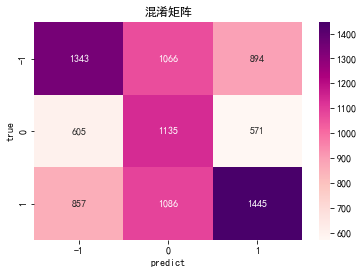

In [31]:
# 模型评估
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cfm = confusion_matrix(Y,y_predict,labels=[-1,0,1])
plt.rcParams['font.family']=['sans-serif']
plt.rcParams['font.sans-serif']=['SimHei']
# plt.matshow(cfm)
# plt.show()
f,ax = plt.subplots()
sns.heatmap(cfm,annot=True,ax=ax,xticklabels=[-1,0,1],yticklabels=[-1,0,1],fmt="d",cmap="RdPu")
ax.set_title('混淆矩阵')
ax.set_xlabel('predict')
ax.set_ylabel('true')
plt.show()